In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

     PassengerId  Survived
0       0.000000       0.0
1       0.002398       1.0
2       0.004796       0.0
3       0.007194       0.0
4       0.009592       1.0
..           ...       ...
413     0.990408       0.0
414     0.992806       1.0
415     0.995204       0.0
416     0.997602       0.0
417     1.000000       0.0

[418 rows x 2 columns]


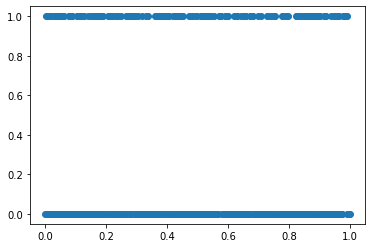

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [5]:
dataset = pd.read_csv("/content/gender_submission.csv")
dataset.head()

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

dataset = pd.DataFrame(dataset, columns=['PassengerId', 'Survived'])

print(dataset)

x = dataset['PassengerId']
y = dataset['Survived']


plt.scatter(x, y)
plt.show()

# xArray = x.to_numpy()
# yArray = y.to_numpy()

weight = 0
bias = 0

def sigmoid(input):
  output = 1 /(1 + np.exp(-input))
  return output

def optimize(x, y, learning_rate, iterations):
    size = x.shape[0]
    w = 0
    b = 1

    for i in range(iterations):
      sigma = sigmoid(np.dot(x, w) + b)
      cost = -1/size * np.sum(y * (np.log(sigma)) + (1 - y) * (1 - np.log(sigma)))
      dw = 1/size * np.sum(np.dot(x, sigma - y))
      db = 1/size * np.sum(sigma - y)
      w -= learning_rate * dw
      b -= learning_rate * db

    return w, b


weight, bias = optimize(x, y, 0.03, 100)

output_values = np.dot(weight, x) + bias

pred = (sigmoid(output_values) >= 1/2)

print(pred)


